Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

trtbps : resting blood pressure (in mm Hg)

ca: number of major vessels (0-3)

cp : Chest Pain type

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score


import tensorflow as tf

In [7]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

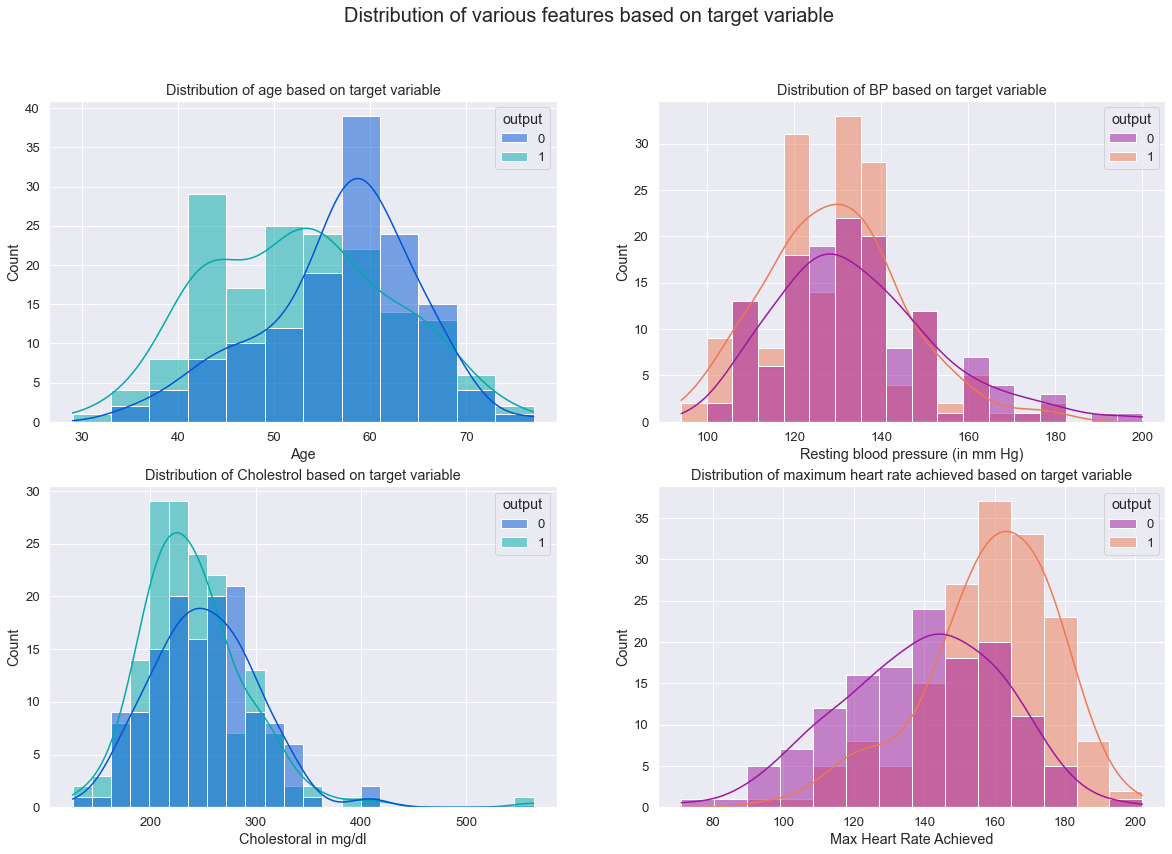

In [12]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= data, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= data, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= data, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= data, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

In [46]:
numeric_var = ["age", "trtbps", "chol", "oldpeak", "thalachh"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
data[categoric_var] = data[categoric_var].astype(str)

In [47]:
numeric_var

['age', 'trtbps', 'chol', 'oldpeak', 'thalachh']

In [48]:
data[numeric_var].head()

,age,trtbps,chol,oldpeak,thalachh
0,63,145,233,2.3,150
1,37,130,250,3.5,187
2,41,130,204,1.4,172
3,56,120,236,0.8,178
4,57,120,354,0.6,163


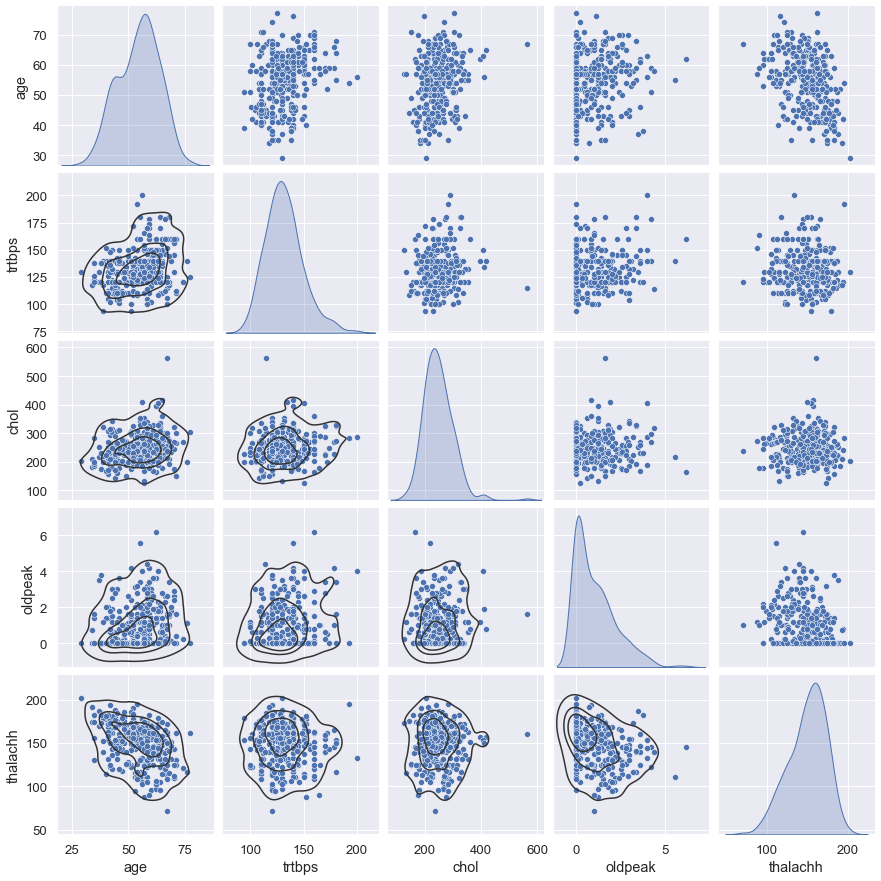

In [49]:
graph = sns.pairplot(data[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

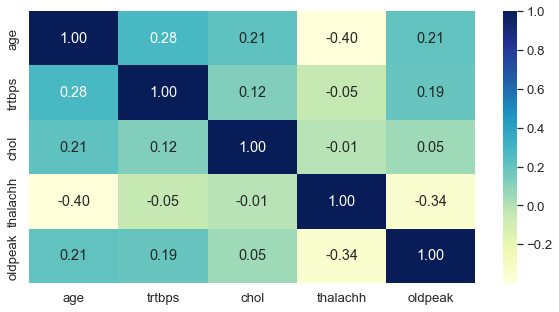

In [51]:
plt.figure(figsize= (10, 5))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

In [52]:
def skewness(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    return skew_df

In [54]:
skewness(data=data[numeric_var])

,Feature,Skew,Absolute Skew
0,age,-0.201460,0.201460
1,trtbps,0.710230,0.710230
2,chol,1.137733,1.137733
3,oldpeak,1.263426,1.263426
4,thalachh,-0.534746,0.534746


In [55]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [56]:
X = data.drop('output_1', axis= 1)
y = data.output_1

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,random_state= 42)

In [59]:
print(X_train.shape)

(242, 22)


In [60]:
model = tf.keras.Sequential([
    tf.keras.Input(22),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.20)

Epoch 1/50
7/7 [==============================] - 2s 79ms/step - loss: 0.7001 - auc: 0.6037 - val_loss: 0.6211 - val_auc: 0.7636
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6372 - auc: 0.6997 - val_loss: 0.5553 - val_auc: 0.8605
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5855 - auc: 0.7738 - val_loss: 0.5198 - val_auc: 0.8920
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5497 - auc: 0.8078 - val_loss: 0.4846 - val_auc: 0.9065
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5113 - auc: 0.8484 - val_loss: 0.4546 - val_auc: 0.9167
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.4653 - auc: 0.8757 - val_loss: 0.4315 - val_auc: 0.9167
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4459 - auc: 0.8910 - val_loss: 0.4141 - val_auc: 0.9184
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4257 - auc: 0.8963 - val_loss: 

In [61]:
evaluation = model.evaluate(X_test, y_test, verbose = 0)
print(f'AUC Score: {evaluation[1]}')

AUC Score: 0.90678870677948


In [62]:
pred = model.predict(X_test)
pred = tf.cast(tf.round(pred), dtype=tf.int32).numpy().reshape(61)

2/2 [==============================] - 0s 5ms/step


In [63]:
print("True heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

True heart attack chances      : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
Predicted heart attack chances : [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0]


In [64]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 86.89%
